In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline

In [2]:
def getdata(year):
    year = str(year)[-2:]+str(year+1)[-2:]
    url = "https://www.football-data.co.uk/mmz4281/"+year+"/E0.csv"
    return pd.read_csv(url)

In [3]:
df=pd.concat([getdata(2020),getdata(2021)],ignore_index=True)
df

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,12/09/2020,12:30,Fulham,Arsenal,0,3,A,0,1,...,1.84,0.75,2.01,1.89,2.02,1.91,2.13,1.92,2.02,1.87
1,E0,12/09/2020,15:00,Crystal Palace,Southampton,1,0,H,1,0,...,1.70,0.25,1.78,2.13,1.79,2.17,1.85,2.18,1.79,2.12
2,E0,12/09/2020,17:30,Liverpool,Leeds,4,3,H,3,2,...,2.62,-1.50,1.85,2.05,1.85,2.08,1.90,2.16,1.84,2.04
3,E0,12/09/2020,20:00,West Ham,Newcastle,0,2,A,0,0,...,1.92,-0.50,2.03,1.87,2.04,1.88,2.09,1.91,2.02,1.86
4,E0,13/09/2020,14:00,West Brom,Leicester,0,3,A,0,0,...,1.73,0.25,1.92,1.98,1.93,1.99,1.95,2.01,1.91,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,E0,13/02/2022,14:00,Burnley,Liverpool,0,1,A,0,1,...,2.81,2.00,1.85,2.08,1.83,2.09,1.88,2.20,1.82,2.07
610,E0,13/02/2022,14:00,Newcastle,Aston Villa,1,0,H,1,0,...,2.00,0.00,2.02,1.91,2.02,1.91,2.04,1.92,2.00,1.88
611,E0,13/02/2022,14:00,Tottenham,Wolves,0,2,A,0,2,...,1.74,-0.75,1.91,2.02,1.92,2.01,1.94,2.03,1.91,1.97
612,E0,13/02/2022,16:30,Leicester,West Ham,2,2,D,1,1,...,2.13,0.25,1.82,2.11,1.85,2.07,1.86,2.19,1.78,2.12


In [4]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,1.412052,1.315961,0.672638,0.591205,13.232899,11.501629,4.617264,4.105863,10.855049,10.446254,...,2.065163,-0.180375,1.945130,1.963681,1.958257,1.971010,2.015961,2.037492,1.932003,1.953111
std,1.324109,1.236149,0.828923,0.804142,5.475989,5.092537,2.582112,2.394297,3.494601,3.572992,...,0.388330,0.897328,0.103261,0.100375,0.106448,0.105125,0.111297,0.109170,0.094698,0.095091
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.390000,-2.750000,1.650000,1.580000,1.660000,1.560000,1.800000,1.640000,1.700000,1.590000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,1.790000,-0.750000,1.870000,1.890000,1.870000,1.890000,1.930000,1.950000,1.850000,1.870000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,11.000000,10.000000,...,1.995000,-0.250000,1.950000,1.970000,1.950000,1.970000,2.010000,2.040000,1.920000,1.960000
75%,2.000000,2.000000,1.000000,1.000000,16.750000,15.000000,6.000000,6.000000,13.000000,13.000000,...,2.237500,0.250000,2.030000,2.050000,2.040000,2.060000,2.090000,2.120000,2.010000,2.030000
max,9.000000,7.000000,4.000000,4.000000,31.000000,30.000000,15.000000,14.000000,23.000000,25.000000,...,3.780000,2.500000,2.350000,2.200000,2.590000,2.380000,2.850000,2.520000,2.450000,2.230000


In [5]:
df = df[["HomeTeam","AwayTeam","FTHG","FTAG","FTR","HS","AS","HST","AST"]]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  614 non-null    object
 1   AwayTeam  614 non-null    object
 2   FTHG      614 non-null    int64 
 3   FTAG      614 non-null    int64 
 4   FTR       614 non-null    object
 5   HS        614 non-null    int64 
 6   AS        614 non-null    int64 
 7   HST       614 non-null    int64 
 8   AST       614 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 43.3+ KB


In [7]:
df.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,HST,AST
0,Fulham,Arsenal,0,3,A,5,13,2,6
1,Crystal Palace,Southampton,1,0,H,5,9,3,5
2,Liverpool,Leeds,4,3,H,22,6,6,3
3,West Ham,Newcastle,0,2,A,15,15,3,2
4,West Brom,Leicester,0,3,A,7,13,1,7


In [8]:
df=df.rename(columns={'FTHG':'HomeGoals','FTAG':'AwayGoals','FTR':'Result','HS':'HomeShot','AS':'AwayShot','HST':'HomeTarget','AST':'AwayTarget'})

array([[<AxesSubplot:title={'center':'HomeGoals'}>,
        <AxesSubplot:title={'center':'AwayGoals'}>],
       [<AxesSubplot:title={'center':'HomeShot'}>,
        <AxesSubplot:title={'center':'AwayShot'}>],
       [<AxesSubplot:title={'center':'HomeTarget'}>,
        <AxesSubplot:title={'center':'AwayTarget'}>]], dtype=object)

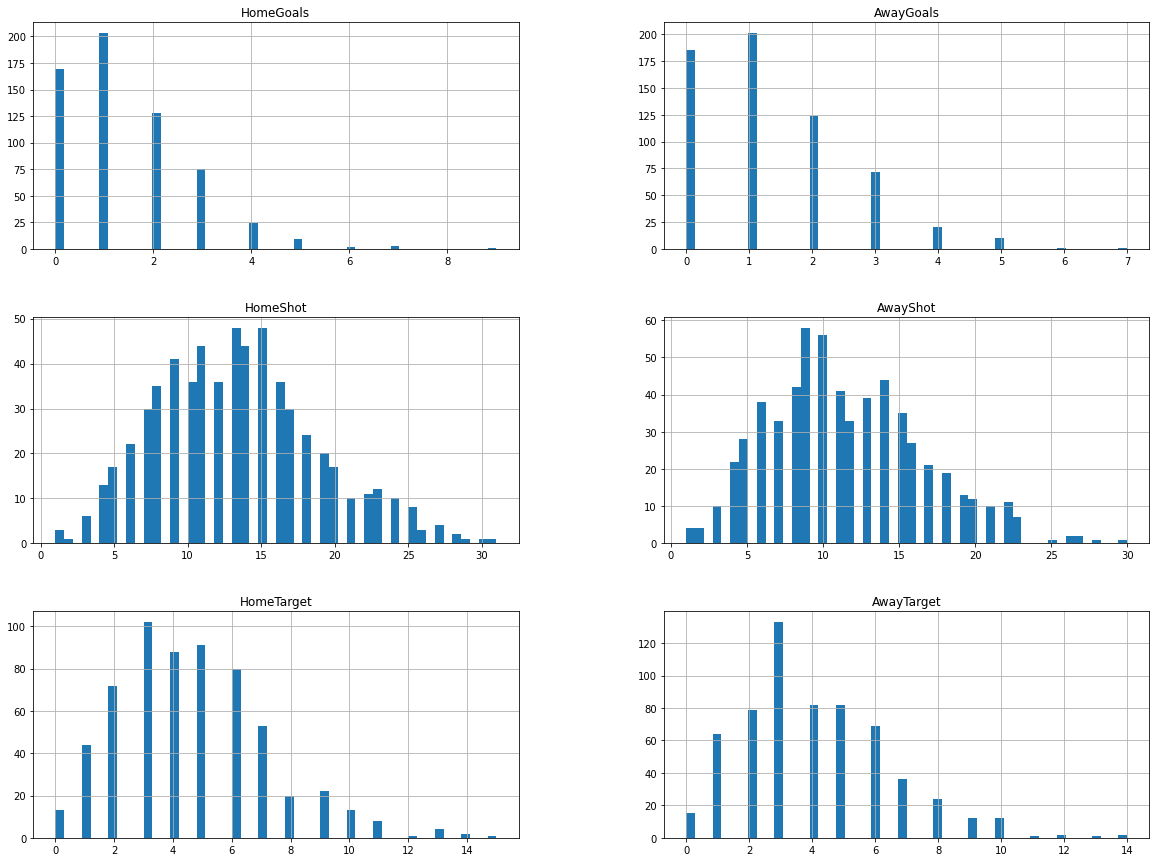

In [9]:
df.hist(bins=50,figsize=(20,15))

In [10]:
df.corr()

,HomeGoals,AwayGoals,HomeShot,AwayShot,HomeTarget,AwayTarget
HomeGoals,1.000000,-0.095617,0.345819,-0.185778,0.630692,-0.118752
AwayGoals,-0.095617,1.000000,-0.212119,0.396402,-0.179774,0.611510
HomeShot,0.345819,-0.212119,1.000000,-0.426846,0.683435,-0.295645
AwayShot,-0.185778,0.396402,-0.426846,1.000000,-0.275427,0.695767
HomeTarget,0.630692,-0.179774,0.683435,-0.275427,1.000000,-0.201100
AwayTarget,-0.118752,0.611510,-0.295645,0.695767,-0.201100,1.000000


In [11]:
df

,HomeTeam,AwayTeam,HomeGoals,AwayGoals,Result,HomeShot,AwayShot,HomeTarget,AwayTarget
0,Fulham,Arsenal,0,3,A,5,13,2,6
1,Crystal Palace,Southampton,1,0,H,5,9,3,5
2,Liverpool,Leeds,4,3,H,22,6,6,3
3,West Ham,Newcastle,0,2,A,15,15,3,2
4,West Brom,Leicester,0,3,A,7,13,1,7
...,...,...,...,...,...,...,...,...,...
609,Burnley,Liverpool,0,1,A,8,12,5,4
610,Newcastle,Aston Villa,1,0,H,10,11,2,1
611,Tottenham,Wolves,0,2,A,17,11,7,7
612,Leicester,West Ham,2,2,D,13,8,2,3


In [20]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(df,df['HomeTeam']):
        train_set = df.loc[train_index]
        test_set = df.loc[test_index]

In [26]:
data=train_set.copy()

In [30]:
data.corr()

,HomeGoals,AwayGoals,HomeShot,AwayShot,HomeTarget,AwayTarget
HomeGoals,1.000000,-0.103685,0.353625,-0.210659,0.619253,-0.121647
AwayGoals,-0.103685,1.000000,-0.222957,0.412300,-0.190379,0.619319
HomeShot,0.353625,-0.222957,1.000000,-0.432987,0.689188,-0.284734
AwayShot,-0.210659,0.412300,-0.432987,1.000000,-0.272561,0.702030
HomeTarget,0.619253,-0.190379,0.689188,-0.272561,1.000000,-0.191100
AwayTarget,-0.121647,0.619319,-0.284734,0.702030,-0.191100,1.000000


In [32]:
data["HomeTargetPercent"] = data["HomeTarget"]/data["HomeShot"]
data["AwayTargetPercent"] = data["AwayTarget"]/data["AwayShot"]

In [40]:
data = train_set.drop(['HomeGoals','AwayGoals'],axis=1)
data_labels = train_set[['HomeGoals','AwayGoals']].copy()

In [41]:
data

,HomeTeam,AwayTeam,Result,HomeShot,AwayShot,HomeTarget,AwayTarget
550,Norwich,Arsenal,A,4,16,2,6
105,Liverpool,Wolves,H,11,9,6,3
237,Wolves,Leeds,H,15,18,5,7
12,Southampton,Tottenham,A,14,9,7,6
243,Aston Villa,Leicester,A,11,16,2,7
...,...,...,...,...,...,...,...
32,Leicester,West Ham,A,4,14,0,6
30,Leeds,Man City,D,12,23,7,2
227,Man City,Tottenham,H,15,7,6,3
242,West Ham,Tottenham,H,4,20,4,4
